In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
Mercedes=pd.read_csv('Mercedes.csv')
y=Mercedes['y']
Mercedes.drop(columns='y',inplace=True)
missing_value_percentage_df=pd.DataFrame({'Column_Name':Mercedes.columns,
                                         'Missing_Values_Count':Mercedes.isnull().sum(),
                                         'Missing_Values_Percentage':Mercedes.isnull().sum()/Mercedes.shape[0]*100
                                         })
missing_value_percentage_df=missing_value_percentage_df.sort_values(by='Missing_Values_Percentage',ascending=False)
missing_value_percentage_df.to_csv("MISSING_VALUES.csv")





In [2]:
Mercedes.columns
Mercedes.isnull()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
#columns drop that are unique
cols_to_drop=[]

cols_with_missing_values_grt_50=list(missing_value_percentage_df[missing_value_percentage_df['Missing_Values_Percentage']>50].index)

for col in Mercedes.columns:
    if Mercedes[col].nunique()==Mercedes.shape[0] or Mercedes[col].nunique()==1:
        cols_to_drop.append(col)
        
columns_to_drop=cols_to_drop+cols_with_missing_values_grt_50

Mercedes.drop(columns=columns_to_drop,inplace=True)

Mercedes.shape

(4209, 364)

In [4]:
Mercedes.describe()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
Mercedes

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Mercedes,y,test_size=0.3,random_state=43)

#Filling missing values

for col in x_train.columns:
    if x_train[col].dtype=='object':
        x_train[col]=x_train[col].fillna(x_train[col].mode()[0]).astype(object)
        x_test[col]=x_test[col].fillna(x_train[col].mode()[0]).astype(object)
        
    else:
        x_train[col]=x_train[col].fillna(x_train[col].mean())
        x_test[col]=x_test[col].fillna(x_train[col].mean())
x_train.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [7]:
for col in Mercedes:
    Mercedes[col]=Mercedes[col].astype(object)
    
Mercedes.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380    object
X382    object
X383    object
X384    object
X385    object
Length: 364, dtype: object

In [8]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [9]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le=LabelEncoderExt()

for col in x_train.columns:
    if x_train[col].dtype=='object':
        le.fit(x_train[col])
        x_train[col]=le.transform(x_train[col])
        x_test[col]=le.transform(x_test[col])



In [10]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_pred=linreg.predict(x_test)

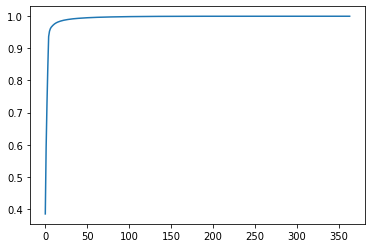

In [11]:
from sklearn.decomposition import PCA
pca=PCA()
x_train_pca_df=pd.DataFrame(pca.fit_transform(x_train))
x_train_pca_df

pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [12]:
pca_1=PCA(n_components=50)
x_train_pca_df=pd.DataFrame(pca_1.fit_transform(x_train),columns=list(range(0,50)))
x_test_pca_df=pd.DataFrame(pca_1.transform(x_test))
x_train_pca_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-8.992918,-6.415499,-13.090951,6.490323,-8.402477,1.148071,-3.317930,1.081326,-0.056601,-0.640631,...,-0.347822,0.385402,0.067010,0.087680,-0.741603,0.021435,0.273074,-0.067700,0.077387,-0.290818
1,0.010711,-12.560818,-2.176750,7.119770,-12.270433,-1.497864,-1.773962,1.951579,-1.359794,0.076516,...,-0.010283,-0.001191,-0.043629,-0.304684,0.211067,-0.358217,-0.167742,0.075132,-0.160299,-0.242262
2,-14.417847,-10.772175,-8.020696,7.548416,-0.556096,-2.079594,3.783969,0.956454,0.196572,-0.919837,...,0.539697,0.170813,-0.097785,-0.038224,0.106293,0.371588,0.059670,-0.210713,0.248031,-0.051217
3,19.337170,16.957308,-11.010379,-16.150718,9.427183,0.542482,-4.015087,1.703101,0.067308,-0.753850,...,-0.175804,-0.340459,-0.032581,-0.503437,0.059849,0.408580,-0.119619,0.218482,0.232433,0.078178
4,-3.248148,-0.483487,-10.206875,2.117789,-5.648465,-4.018507,1.246331,-1.301905,0.229513,-0.361335,...,-0.019400,0.032576,0.200582,0.303125,0.621474,0.277449,0.106179,-0.192808,0.294903,-0.055996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,17.434809,-11.475678,7.636850,3.645526,6.662979,-2.896261,2.881011,1.119493,-0.879816,2.567962,...,-0.004725,-0.114596,0.846131,0.321477,-0.471429,0.434226,0.758681,0.385897,0.176799,-0.542726
2942,20.800282,16.108734,-2.149088,-3.768181,4.097215,4.024658,0.886114,1.625471,-1.538022,5.150175,...,0.155036,-0.091153,0.048279,-0.148042,-0.046350,0.013022,0.001398,0.087852,-0.126656,0.072040
2943,27.175394,15.062999,4.538708,-0.805213,-6.202816,3.673471,1.770822,-0.133327,0.371031,-1.275828,...,-0.019815,0.283724,0.115964,0.384170,0.125253,0.183921,-0.003067,0.015128,0.067067,0.025674
2944,12.416357,-11.981517,10.212891,2.546944,10.282042,-1.621615,1.470592,0.329822,-0.557430,-0.880470,...,0.479209,-0.602094,0.475686,-0.666426,0.556238,-0.145319,0.269062,-0.103674,0.444035,0.144987


In [13]:
#vif before pca
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["column Name"]=x_train.columns
vif

,VIF Factor,column Name
0,2.783299,X0
1,6.680951,X1
2,20.659117,X2
3,2.943191,X3
4,1.051234,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.581976,X383
362,1.838050,X384


In [14]:
#vif after pca,there is no multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_pca=pd.DataFrame()
vif_pca["VIF Factor_PCA"]=[variance_inflation_factor(x_train_pca_df.values,i)for i in range(x_train_pca_df.shape[1])]
vif_pca["column Name"]=x_train_pca_df.columns
vif_pca

,VIF Factor_PCA,column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [15]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train_pca_df,y_train)

y_pred=linreg.predict(x_test_pca_df)
y_pred
new_df=pd.DataFrame({'actuals':y_test,
      'predicted':y_pred})
new_df

,actuals,predicted
1111,94.55,91.629003
2998,99.64,96.024709
818,89.60,95.292162
3300,87.05,90.103267
294,76.59,78.332150
...,...,...
4030,103.85,107.595725
1634,109.71,93.096101
2957,120.38,114.304266
1526,87.85,92.939644


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()
lin_reg.fit(x_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(x_train_pca_df)
y_linreg_pred


array([ 92.88882296,  95.19084311,  95.17791265, ..., 111.7515056 ,
       109.32680584, 101.81305664])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

linreg=LinearRegression()
linreg.fit(x_train_pca_df,y_train)

y_pred=linreg.predict(x_test_pca_df)
y_pred

print('R2',r2_score(y_test,y_pred))
print('R2 linear reg class',linreg.score(x_test_pca_df,y_test))
linreg.coef_

R2 0.4611160083590212
R2 linear reg class 0.46111600835902117


array([ 1.67639484e-01,  2.25382459e-02, -1.52527107e-01, -1.49563837e-03,
        4.39747251e-02, -2.87351405e-02,  1.03172196e+00, -2.59345183e+00,
       -4.67827901e-01,  3.19690097e+00,  3.37574435e-01, -3.58410896e+00,
        1.32423191e+00, -2.67983869e+00, -3.99087283e-03,  7.69563867e-01,
        6.12023211e+00,  5.92275655e-01, -4.00886932e-01,  8.23460204e-01,
       -9.16572710e-01,  6.49530020e-01,  1.67731671e+00,  3.49135837e-01,
        1.22483621e+00,  7.43620559e-01, -2.32202758e-01, -8.91293290e-01,
       -8.10014868e-01,  3.39623262e-01, -1.29487479e+00,  2.06375799e-02,
       -2.13749863e+00, -5.16731352e-01, -1.23327392e-01,  2.00025809e-01,
        1.35158299e-01, -7.32910743e-01, -5.80596645e-02, -6.50301545e-01,
       -8.30568380e-01, -9.09777638e-01,  1.09284079e+00, -5.16403520e-01,
       -1.24759729e+00,  1.29061389e-01,  1.45270833e-01, -2.06381487e+00,
       -1.39462077e+00, -2.19721240e-01])

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
decreg=DecisionTreeRegressor()

new_dict={'max_depth':[2,3,4],
         'max_leaf_nodes':[2,3,6],
         'min_samples_leaf':[5,4,3],
         'min_samples_split':[5,3,4]}

gcv=GridSearchCV(decreg,param_grid=new_dict,cv=3)
gcv.fit(x_train_pca_df,y_train)

decreg_pred=gcv.predict(x_test_pca_df)
decreg_pred



array([ 95.74416602,  95.74416602,  95.74416602, ..., 103.62468872,
       103.62468872,  99.22469767])

In [19]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

rcv=RandomizedSearchCV(decreg,param_distributions=new_dict,n_iter=100)
rcv.fit(x_train_pca_df,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=100, n_jobs=None,
                   pa

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfc=RandomForestRegressor()
rfc_dict={'max_depth':[2,3,4],
         'max_leaf_nodes':[2,3,6],
         'min_samples_leaf':[5,4,3,2],
         'min_samples_split':[5,3,4],
         'n_estimators':[50]
         }
gcv=GridSearchCV(rfc,param_grid=new_dict,cv=3)
gcv.fit(x_train_pca_df,y_train)
gcv_pred=gcv.predict(x_test_pca_df)
gcv_pred

array([ 96.07311613,  95.22818332,  96.07311613, ..., 104.47139234,
       102.85008252, 103.67354916])

In [21]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor()
abc.fit(x_train_pca_df,y_train)
abc_pred=abc.predict(x_test_pca_df)
abc_pred

array([104.16110497, 104.67818182, 102.03326859, ..., 115.63203297,
       106.50669749, 112.53915795])

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
sgdc=SGDRegressor()
n_dict={'penalty':['l2'],
       'alpha':[0.001,0.01,0.0001,0.1],
       'l1_ratio':[0.10,0.56,0.34],
       'eta0':[1],
       'learning_rate':['adaptive','optimal']}
gcv=GridSearchCV(sgdc,param_grid=n_dict,cv=3)
gcv.fit(x_train_pca_df,y_train)
decreg_pred=gcv.predict(x_test_pca_df)
decreg_pred

array([ 91.68107134,  96.0531726 ,  95.29765965, ..., 113.64728324,
        93.03592978, 105.26247814])

In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv_dict=({'C':[1.0,1.1,1.2],
         'kernel':['linear','poly','rbf','sigmoid'],
         'degree':[3,2,4],'gamma':[1,2,3]})
gcv=GridSearchCV(sv,param_grid=sv_dict,cv=3)
gcv.fit(x_train_pca_df,y_train)

sv_pred=gcv.predict(x_test_pca_df)
sv_pred